Connected to database: data_warehouse.db
Table 'employees' created successfully

=== Fetched Data from Database ===
(1, 'Alice', 24, 50000)
(2, 'Bob', 30, 60000)
(3, 'Charlie', 22, 55000)
(4, 'David', 35, 70000)
(5, 'Eva', 28, 65000)

=== Dataframe Head ===
   id     name  age  salary
0   1    Alice   24   50000
1   2      Bob   30   60000
2   3  Charlie   22   55000
3   4    David   35   70000
4   5      Eva   28   65000

=== Dataframe Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5 non-null      int64 
 1   name    5 non-null      object
 2   age     5 non-null      int64 
 3   salary  5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 292.0+ bytes
None

=== Dataframe Description ===
             id        age       salary
count  5.000000   5.000000      5.00000
mean   3.000000  27.800000  60000.00000
std    1.581139   5.118

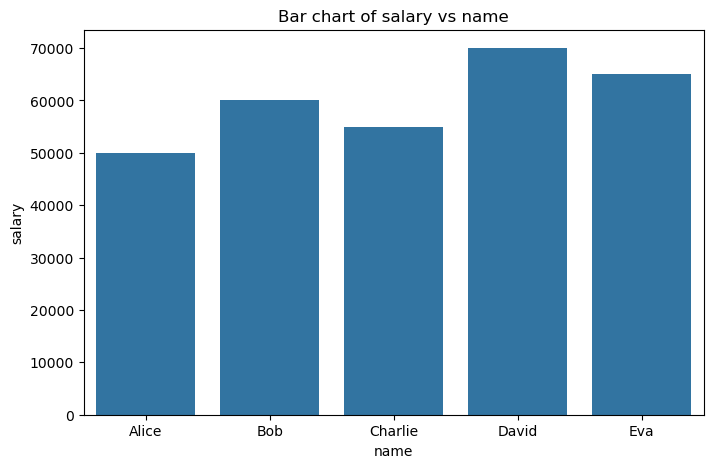

In [1]:
# simple_data_warehouse.py
# Creating a simple data warehouse using Python, Pandas, and SQLite

import pandas as pd
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to create a database connection
def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(f"Connected to database: {db_file}")
    except Error as e:
        print(e)
    return conn

# Function to execute a query
def execute_query(conn, query):
    try:
        c = conn.cursor()
        c.execute(query)
        conn.commit()
        print("Query executed successfully")
    except Error as e:
        print(e)

# Function to fetch data from a query
def fetch_data(conn, query):
    try:
        c = conn.cursor()
        c.execute(query)
        rows = c.fetchall()
        return rows
    except Error as e:
        print(e)
        return None

# Function to create a table from a DataFrame
def create_table_from_df(conn, df, table_name):
    df.to_sql(table_name, conn, if_exists='replace', index=False)
    print(f"Table '{table_name}' created successfully")

# Function to visualize data
def visualize_data(df, x, y, kind='bar'):
    plt.figure(figsize=(8, 5))
    if kind == 'bar':
        sns.barplot(x=x, y=y, data=df)
    elif kind == 'line':
        sns.lineplot(x=x, y=y, data=df)
    elif kind == 'scatter':
        sns.scatterplot(x=x, y=y, data=df)
    plt.title(f"{kind.capitalize()} chart of {y} vs {x}")
    plt.show()

# Function to perform basic data analysis
def basic_data_analysis(df):
    print("\n=== Dataframe Head ===")
    print(df.head())
    print("\n=== Dataframe Info ===")
    print(df.info())
    print("\n=== Dataframe Description ===")
    print(df.describe())
    print("\n=== Missing Values ===")
    print(df.isnull().sum())

# Main function
def main():
    database = "data_warehouse.db"
    conn = create_connection(database)

    if conn is not None:
        # Create a sample dataframe
        data = {
            'id': [1, 2, 3, 4, 5],
            'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
            'age': [24, 30, 22, 35, 28],
            'salary': [50000, 60000, 55000, 70000, 65000]
        }
        df = pd.DataFrame(data)

        # Create table from dataframe
        create_table_from_df(conn, df, 'employees')

        # Fetch data from table
        rows = fetch_data(conn, "SELECT * FROM employees")
        print("\n=== Fetched Data from Database ===")
        for row in rows:
            print(row)

        # Perform basic data analysis
        basic_data_analysis(df)

        # Visualize data
        visualize_data(df, x='name', y='salary', kind='bar')

        conn.close()
    else:
        print("Error! Cannot create the database connection.")

# Entry point
if __name__ == '__main__':
    main()
